In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from skyfield.api import load
#commented out the line below becasue i already downloaed it
#!pip install skyfield
%pip install -q "xlrd>=2.0.1"
from pathlib import Path

Note: you may need to restart the kernel to use updated packages.


In [57]:
# From the project details it told me to download the messier objects, i just found someone's github repo that had then and then i double checked with claude if it was accuture, here im going to import then and then we can start.


The `!pip install` command will install the xlrd package in your environment. After that, the pandas read_excel function should work correctly with your .xls file.


The `!pip install` command will install the xlrd package in your environment. After that, the pandas read_excel function should work correctly with your .xls file.

//this is where i tried to import the messier files from a github boy was that a mistake but i wanted to document the journey
!git clone https://github.com/mattiaverga/OpenNGC.git


#Gave me an error so i fixed it by adding spe = ';'
ngc = pd.read_csv("OpenNGC/database_files/NGC.csv")
ngc.head()

In [59]:
ngc = pd.read_csv("OpenNGC/database_files/NGC.csv", sep=';')
ngc.head()

,Name,Type,RA,Dec,Const,MajAx,MinAx,PosAng,B-Mag,V-Mag,...,Cstar V-Mag,M,NGC,IC,Cstar Names,Identifiers,Common names,NED notes,OpenNGC notes,Sources
0,IC0001,**,00:08:27.05,+27:43:03.6,Peg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99
1,IC0002,G,00:11:00.88,-12:49:22.3,Cet,0.98,0.32,142.0,15.46,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00110081-1249206,IRAS 00084-1306,MCG -0...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...
2,IC0003,G,00:12:06.09,-00:24:54.8,Psc,0.93,0.67,53.0,14.78,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00120604-0024543,MCG +00-01-038,PGC 000...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...
3,IC0004,G,00:13:26.94,+17:29:11.2,Peg,1.17,0.84,12.0,14.14,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00132695+1729111,IRAS 00108+1712,MCG +0...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...
4,IC0005,G,00:17:34.93,-09:32:36.1,Cet,0.99,0.66,9.0,14.57,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00173495-0932364,MCG -02-01-047,PGC 001...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...


# Trying to fix NaN values
It seems like a lot of these values are NaN maybe it has something to do with the way I parsed the data, so I'll put some fixes in.

In [114]:
# keep rows that actually have coordinates
ngc = ngc.dropna(subset=['RA', 'Dec']).copy()

# fill number columns with each column's median
num_cols = ngc.select_dtypes(include='number').columns
ngc[num_cols] = ngc[num_cols].fillna(ngc[num_cols].median())

# fill text columns with "Unknown"
obj_cols = ngc.select_dtypes(include='object').columns
ngc[obj_cols] = ngc[obj_cols].fillna('Unknown')

# checking
print("shape (rows, cols):", ngc.shape)
print("missing RA:", ngc['RA'].isna().sum(), "| missing Dec:", ngc['Dec'].isna().sum())

# peek
ngc.head(3)

shape (rows, cols): (13962, 33)
missing RA: 0 | missing Dec: 0


,Name,Type,RA,Dec,Const,MajAx,MinAx,PosAng,B-Mag,V-Mag,...,M,NGC,IC,Cstar Names,Identifiers,Common names,NED notes,OpenNGC notes,Sources,M_num
0,IC0001,**,00:08:27.05,+27:43:03.6,Peg,1.20,0.69,87.0,14.42,12.38,...,56.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Type:1|RA:1|Dec:1|Const:99,56.0
1,IC0002,G,00:11:00.88,-12:49:22.3,Cet,0.98,0.32,142.0,15.46,12.38,...,56.0,Unknown,Unknown,Unknown,"2MASX J00110081-1249206,IRAS 00084-1306,MCG -0...",Unknown,Unknown,Unknown,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...,56.0
2,IC0003,G,00:12:06.09,-00:24:54.8,Psc,0.93,0.67,53.0,14.78,12.38,...,56.0,Unknown,Unknown,Unknown,"2MASX J00120604-0024543,MCG +00-01-038,PGC 000...",Unknown,Unknown,Unknown,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...,56.0


In [62]:
if 'ngc_raw' not in globals():
    ngc_raw = pd.read_csv("OpenNGC/database_files/NGC.csv", sep=';')  # from the OpenNGC folder

In [63]:
#this restarts from the raw copy so I don't carry the old median in M
ngc = ngc_raw.copy()

#this is to keep the rows that actually have the coordinates
ngc = ngc.dropna(subset=['RA', 'Dec'])

#this keeps id columns safe (dont fill with medians)
num_cols = ngc.select_dtypes(include='number').columns
num_cols = [c for c in num_cols if c not in ['M']]  # M is the Messier id, leave as NaN
ngc[num_cols] = ngc[num_cols].fillna(ngc[num_cols].median())

#fill text colummns
obj_cols = ngc.select_dtypes(include='object').columns
ngc[obj_cols] = ngc[obj_cols].fillna('Unknown')

#this marks which rows are messier objects
ngc['is_messier'] = ngc['M'].notna()

#this is a quick check
print("Total rows:", len(ngc))
print("Messier rows:", int(ngc['is_messier'].sum()))

#this shows a few messier rows
messier_preview = ngc[ngc['is_messier']][['Name','M','Type','RA','Dec']].head(5)
messier_preview

Total rows: 13962
Messier rows: 107


,Name,M,Type,RA,Dec
4903,IC4715,24.0,*Ass,18:16:56.12,-18:30:52.4
4913,IC4725,25.0,OCl,18:31:46.77,-19:06:53.8
5810,NGC0205,110.0,G,00:40:22.08,+41:41:07.1
5826,NGC0221,32.0,G,00:42:41.83,+40:51:55.0
5829,NGC0224,31.0,G,00:42:44.35,+41:16:08.6


In [113]:
# start with the numeric version of M
ngc.loc[:, 'M_num'] = pd.to_numeric(ngc['M'], errors='coerce')

# if M is blank, try to pull like "M45" or "M 045" from the Name text
from_name = ngc['Name'].str.extract(r'\bM\s*0*([0-9]{1,3})\b', expand=False)
ngc.loc[ngc['M_num'].isna(), 'M_num'] = pd.to_numeric(from_name, errors='coerce')

print("unique M numbers found so far:", int(ngc['M_num'].dropna().nunique()))

unique M numbers found so far: 107


In [70]:
#this creates the messier table if it isnt already in memory (prevents NameError)
if 'messier' not in globals():
    messier = ngc[ngc['is_messier']].copy()

# Missing Objects, there should be 110
SO now we have sorted these objects and have gotten the messier objects but we are missing 3 of them, which is annoying i will try and rectify that.

In [116]:
# this makes M_num (from 'M' or Name)
ngc.loc[:, 'M_num'] = pd.to_numeric(ngc['M'], errors='coerce')

# try to pull number from Name like "M45"
from_name = ngc['Name'].str.extract(r'\bM\s*0*([0-9]{1,3})\b', expand=False)
ngc.loc[ngc['M_num'].isna(), 'M_num'] = pd.to_numeric(from_name, errors='coerce')

# simple patches: M40, M45, M102
idx = ngc['Name'].str.contains(r'Winnecke|M\s*40', case=False, na=False)
ngc.loc[idx, 'M_num'] = 40

idx = ngc['Name'].str.contains(r'Pleiades|M\s*45', case=False, na=False)
ngc.loc[idx, 'M_num'] = 45

idx = (ngc['NGC'].astype(str) == '5866') | ngc['Name'].str.contains(r'NGC\s*5866', case=False, na=False)
ngc.loc[idx, 'M_num'] = 102

# make the messier table and count
messier = ngc[ngc['M_num'].between(1, 110, inclusive='both')].dropna(subset=['M_num']).copy()
messier['M_num'] = messier['M_num'].astype(int)
messier = messier.sort_values('M_num')

present  = sorted(messier['M_num'].unique().tolist())
expected = list(range(1, 111))
missing  = [m for m in expected if m not in present]

print("unique M we have:", len(present))
print("missing M numbers:", missing)

unique M we have: 108
missing M numbers: [40, 45]


In [117]:
#this looks for M40 / M45 tags or aliases across ALL text columns
txt_cols = ngc.select_dtypes(include='object').columns
_show = [c for c in ['Name','M','Identifiers','Common names'] if c in ngc.columns]

def any_contains(pattern):
    return pd.DataFrame({c: ngc[c].str.contains(pattern, case=False, na=False) for c in txt_cols}).any(axis=1)

m40_tag   = any_contains(r'\bM\s*0*40\b')
m45_tag   = any_contains(r'\bM\s*0*45\b')
winnecke  = any_contains(r'Winnecke|WNC\s*4|ADS\s*9299')          # common M40 names
pleiades  = any_contains(r'Pleiades|Seven\s*Sisters|Melotte\s*22|Mel\s*22|Collinder\s*42|Cr\s*42')  # M45 names

print("M40 tagged:", int(m40_tag.sum()), "  winnecke:", int(winnecke.sum()))
display(ngc.loc[m40_tag | winnecke, _show].head(12))

print("\nM45 tagged:", int(m45_tag.sum()), "  pleiades:", int(pleiades.sum()))
display(ngc.loc[m45_tag | pleiades, _show].head(12))

M40 tagged: 0   winnecke: 0


,Name,M,Identifiers,Common names



M45 tagged: 0   pleiades: 0


,Name,M,Identifiers,Common names


# NEW SOURCE

I can't get these 2 objects to appear from this sort, and I've tried a lot more stuff that I've deleted, so I will switch to a new source.

In [48]:
# build data/messier_raw.csv once from the Excel
DATA = Path("data"); DATA.mkdir(exist_ok=True)
raw_path = DATA / "messier_raw.csv"

if not raw_path.exists():
    xls = Path("MessierObjects.xls")
    if not xls.exists():
        xls = Path.home() / "Downloads" / "MessierObjects.xls"
    assert xls.exists(), "Put 'MessierObjects.xls' here or in ~/Downloads"

    df_raw = pd.read_excel(xls, engine="xlrd", header=1).dropna(axis=1, how="all")
    df_raw.to_csv(raw_path, index=False)
    print("saved raw:", raw_path)
else:
    print("using raw cache:", raw_path)

using raw cache: data/messier_raw.csv


In [40]:
messier = pd.read_csv("data/messier_raw.csv")
messier.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,ObjectNum,Name,Type,Constellation,RAHour,RAMinute,DecSign,DecDeg,DecMinute,Magnitude,Info,Distance (ly)
1,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,5,34.5,+,22,1,8.4,Size: 6.0x4.0,6300
2,2,NGC 7089,Globular Cluster,Aquarius,21,33.5,-,0,49,6.5,Size: 12.9,37500
3,3,NGC 5272,Globular Cluster,Canes Venatici,13,42.2,+,28,23,6.2,Size: 16.2,33900
4,4,NGC 6121,Globular Cluster,Scorpius,16,23.6,-,26,32,5.6,Size: 26.3,7200


In [49]:
# clean the table and compute RA/Dec (simple + robust)

m = messier.copy()

# if a header row slipped into row 0, promote it
hdr = m.iloc[0].astype(str).str.strip()
if not any(c in m.columns for c in ("ObjectNum", "ObjctNum", "M", "Messier")) \
   and any(x in hdr.values for x in ("ObjectNum", "ObjctNum", "M", "Messier")):
    m.columns = hdr
    m = m.iloc[1:].reset_index(drop=True)

# find the Messier ID column (several possible spellings), rename to "M"
if "ObjectNum" in m.columns:
    id_col = "ObjectNum"
elif "ObjctNum" in m.columns:
    id_col = "ObjctNum"
elif "M" in m.columns:
    id_col = "M"
elif "Messier" in m.columns:
    id_col = "Messier"
else:
    raise ValueError(f"can't find Messier ID column; got {list(m.columns)}")

m.rename(columns={id_col: "M"}, inplace=True)

# numeric types where needed
for c in ["M", "RAHour", "RAMinute", "DecDeg", "DecMinute", "Magnitude"]:
    if c in m.columns:
        m[c] = pd.to_numeric(m[c], errors="coerce")

# RA in degrees (either build from parts or keep existing RA_deg)
if {"RAHour", "RAMinute"}.issubset(m.columns):
    m["RA_deg"] = 15.0 * (m["RAHour"].fillna(0) + m["RAMinute"].fillna(0) / 60.0)
elif "RA_deg" in m.columns:
    # already present
    pass
else:
    raise ValueError("no RA columns found (need RAHour/RAMinute or RA_deg)")

# Dec in degrees (build from sign+parts, or keep existing Dec_deg)
if {"DecDeg", "DecMinute"}.issubset(m.columns):
    # sign comes from the '+' / '-' column; default to '+'
    sign = np.where(m.get("DecSign", "+").astype(str).str.strip().eq("-"), -1, 1)
    m["Dec_deg"] = sign * (m["DecDeg"].fillna(0) + m["DecMinute"].fillna(0) / 60.0)
elif "Dec_deg" in m.columns:
    # already present
    pass
else:
    raise ValueError("no Dec columns found (need DecSign/DecDeg/DecMinute or Dec_deg)")

# keep the columns we actually use
cols = ["M", "Name", "Type", "Constellation", "RA_deg", "Dec_deg", "Magnitude"]
cols = [c for c in cols if c in m.columns]
messier_clean = m[cols].sort_values("M").reset_index(drop=True)

# quick sanity: should be exactly 1..110
assert set(messier_clean["M"].dropna().astype(int)) == set(range(1, 111))
print("rows:", len(messier_clean))
messier_clean.head()

rows: 110


,M,Name,Type,Constellation,RA_deg,Dec_deg,Magnitude
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,83.625,22.016667,8.4
1,2,NGC 7089,Globular Cluster,Aquarius,323.375,-0.816667,6.5
2,3,NGC 5272,Globular Cluster,Canes Venatici,205.550,28.383333,6.2
3,4,NGC 6121,Globular Cluster,Scorpius,245.900,-26.533333,5.6
4,5,NGC 5904,Globular Cluster,Serpens Caput,229.650,2.083333,5.6


In [50]:
# save the clean csv and make it the version we use going forward
out_path = Path("data/messier_clean.csv")
messier_clean.to_csv(out_path, index=False)
print("saved clean ->", out_path)

# use this everywhere later
messier = messier_clean.copy()
messier.head()

saved clean -> data/messier_clean.csv


,M,Name,Type,Constellation,RA_deg,Dec_deg,Magnitude
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,83.625,22.016667,8.4
1,2,NGC 7089,Globular Cluster,Aquarius,323.375,-0.816667,6.5
2,3,NGC 5272,Globular Cluster,Canes Venatici,205.550,28.383333,6.2
3,4,NGC 6121,Globular Cluster,Scorpius,245.900,-26.533333,5.6
4,5,NGC 5904,Globular Cluster,Serpens Caput,229.650,2.083333,5.6


In [52]:
# clean the table and compute RA/Dec (robust to either raw parts or ready-made columns)

m = messier.copy()

# if a header row slipped into row 0, promote it
hdr = m.iloc[0].astype(str).str.strip()
if not any(c in m.columns for c in ("ObjectNum", "ObjctNum", "M", "Messier")) \
   and any(x in hdr.values for x in ("ObjectNum", "ObjctNum", "M", "Messier")):
    m.columns = hdr
    m = m.iloc[1:].reset_index(drop=True)

# find the Messier ID column (common spellings) -> rename to "M"
if "ObjectNum" in m.columns:
    id_col = "ObjectNum"
elif "ObjctNum" in m.columns:
    id_col = "ObjctNum"
elif "M" in m.columns:
    id_col = "M"
elif "Messier" in m.columns:
    id_col = "Messier"
else:
    raise ValueError(f"can't find Messier ID column; got {list(m.columns)}")
m.rename(columns={id_col: "M"}, inplace=True)

# make numeric where applicable (guarded)
for c in ["M", "RAHour", "RAMinute", "DecDeg", "DecMinute", "Magnitude", "RA_deg", "Dec_deg"]:
    if c in m.columns:
        m[c] = pd.to_numeric(m[c], errors="coerce")

# RA: build from hour/min if present, else use existing RA_deg
if {"RAHour", "RAMinute"}.issubset(m.columns):
    m["RA_deg"] = 15.0 * (m["RAHour"].fillna(0) + m["RAMinute"].fillna(0) / 60.0)
elif "RA_deg" in m.columns:
    pass
else:
    raise ValueError("no RA columns found (need RAHour/RAMinute or RA_deg)")

# Dec: build from sign + deg/min if present, else use existing Dec_deg
if {"DecDeg", "DecMinute"}.issubset(m.columns):
    # sign from DecSign; default '+'
    sign_col = m.get("DecSign")
    sign = np.where(sign_col.astype(str).str.strip().eq("-"), -1, 1) if sign_col is not None else 1
    m["Dec_deg"] = sign * (m["DecDeg"].fillna(0) + m["DecMinute"].fillna(0) / 60.0)
elif "Dec_deg" in m.columns:
    pass
else:
    raise ValueError("no Dec columns found (need DecSign/DecDeg/DecMinute or Dec_deg)")

# keep the useful columns
cols = ["M", "Name", "Type", "Constellation", "RA_deg", "Dec_deg", "Magnitude"]
cols = [c for c in cols if c in m.columns]
messier_clean = m[cols].sort_values("M").reset_index(drop=True)

# sanity check: must be exactly 1..110
assert set(messier_clean["M"].dropna().astype(int)) == set(range(1, 111))
print("rows:", len(messier_clean))
messier_clean.head()

rows: 110


,M,Name,Type,Constellation,RA_deg,Dec_deg,Magnitude
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,83.625,22.016667,8.4
1,2,NGC 7089,Globular Cluster,Aquarius,323.375,-0.816667,6.5
2,3,NGC 5272,Globular Cluster,Canes Venatici,205.550,28.383333,6.2
3,4,NGC 6121,Globular Cluster,Scorpius,245.900,-26.533333,5.6
4,5,NGC 5904,Globular Cluster,Serpens Caput,229.650,2.083333,5.6


In [53]:
# save the clean table so i don't have to redo the cleaning later
Path("data").mkdir(exist_ok=True)
out_path = Path("data/messier_clean.csv")

messier = messier_clean.copy()
messier.to_csv(out_path, index=False)

print("saved:", out_path)
print("rows:", len(messier))
messier.head()

saved: data/messier_clean.csv
rows: 110


,M,Name,Type,Constellation,RA_deg,Dec_deg,Magnitude
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,83.625,22.016667,8.4
1,2,NGC 7089,Globular Cluster,Aquarius,323.375,-0.816667,6.5
2,3,NGC 5272,Globular Cluster,Canes Venatici,205.550,28.383333,6.2
3,4,NGC 6121,Globular Cluster,Scorpius,245.900,-26.533333,5.6
4,5,NGC 5904,Globular Cluster,Serpens Caput,229.650,2.083333,5.6


In [58]:
# add astropy coords + readable columns
c = SkyCoord(ra=messier["RA_deg"].values * u.deg,
             dec=messier["Dec_deg"].values * u.deg,
             frame="icrs")

# pretty strings for quick eyeballing
messier["RA_hms"]  = c.ra.to_string(unit=u.hour, sep=":", precision=2, pad=True)
messier["Dec_dms"] = c.dec.to_string(unit=u.deg,  sep=":", precision=1, pad=True, alwayssign=True)

# simple galactic coords too
g = c.galactic
messier["l_deg"] = g.l.deg.round(3)
messier["b_deg"] = g.b.deg.round(3)

# preview
messier.head()

,M,Name,Type,Constellation,RA_deg,Dec_deg,Magnitude,RA_hms,Dec_dms,l_deg,b_deg
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,83.625,22.016667,8.4,05:34:30.00,+22:01:00.0,184.552,-5.790
1,2,NGC 7089,Globular Cluster,Aquarius,323.375,-0.816667,6.5,21:33:30.00,-00:49:00.0,53.386,-35.776
2,3,NGC 5272,Globular Cluster,Canes Venatici,205.550,28.383333,6.2,13:42:12.00,+28:23:00.0,42.247,78.705
3,4,NGC 6121,Globular Cluster,Scorpius,245.900,-26.533333,5.6,16:23:36.00,-26:32:00.0,350.969,15.965
4,5,NGC 5904,Globular Cluster,Serpens Caput,229.650,2.083333,5.6,15:18:36.00,+02:05:00.0,3.872,46.789


# Finally done with all the hard annoying sorting of the data

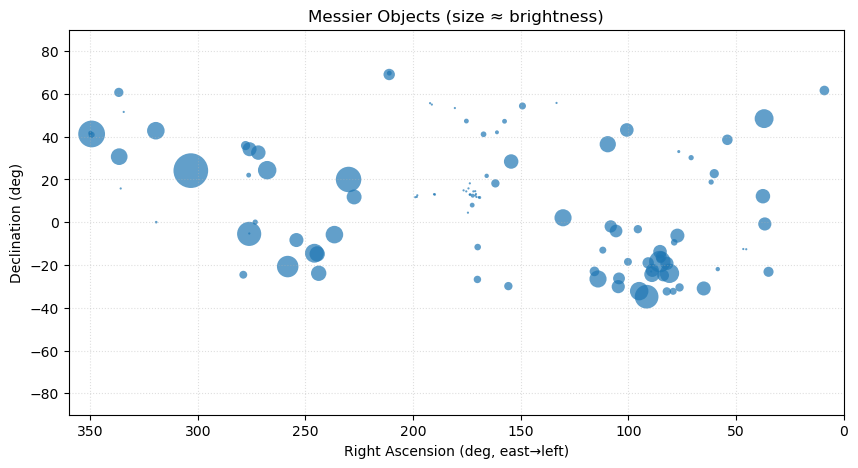

In [59]:
# quick sky map: RA vs Dec (bigger dot = brighter)
m = messier.dropna(subset=["RA_deg", "Dec_deg", "Magnitude"]).copy()

# flip RA so the sky reads east→left like real star charts
x = 360 - m["RA_deg"]
y = m["Dec_deg"]

# simple size scale: brighter (smaller mag) -> larger marker
sizes = (9.5 - m["Magnitude"]).clip(lower=0.5) ** 2 * 10

plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=sizes, alpha=0.7, edgecolors="none")
plt.xlim(360, 0)
plt.ylim(-90, 90)
plt.xlabel("Right Ascension (deg, east→left)")
plt.ylabel("Declination (deg)")
plt.title("Messier Objects (size ≈ brightness)")
plt.grid(True, linestyle=":", alpha=0.4)
plt.show()

In [60]:
# brightest 10 (lowest magnitude)
cols = ["M", "Name", "Type", "Constellation", "Magnitude", "RA_hms", "Dec_dms"]
top10 = (
    messier.dropna(subset=["Magnitude"])
           .sort_values("Magnitude")
           .loc[:, cols]
           .head(10)
           .reset_index(drop=True)
)
top10.index = top10.index + 1  # 1..10
top10

,M,Name,Type,Constellation,Magnitude,RA_hms,Dec_dms
1,45,"Pleiades, Subaru, Seven Sisters",Open Cluster,Taurus,1.6,03:47:00.00,+24:07:12.0
2,31,NGC 224 Andromeda Galaxy,Spiral Galaxy,Andromeda,3.4,00:42:42.00,+41:16:00.0
3,44,NGC 2632 Beehive Cluster (Praesepe),Open Cluster,Cancer,3.7,08:40:06.00,+19:59:00.0
4,42,NGC 1976 Great Orion Nebula,Diffuse Nebula,Orion,4.0,05:35:24.00,-05:27:00.0
5,7,NGC 6475 Ptolemy¹s Cluster,Open Cluster,Scorpius,4.1,17:53:54.00,-34:49:00.0
6,41,NGC 2287,Open Cluster,Canis Major,4.6,06:47:00.00,-20:44:00.0
7,24,NGC 6603 Milky Way Patch,Star Cloud,Sagittarius,4.6,18:18:24.00,-18:25:00.0
8,22,NGC 6656,Globular Cluster,Sagittarius,5.1,18:36:24.00,-23:54:00.0
9,47,NGC 2422,Open Cluster,Puppis,5.2,07:36:36.00,-14:30:00.0
10,39,NGC 7092,Open Cluster,Cygnus,5.2,21:32:12.00,+48:26:00.0


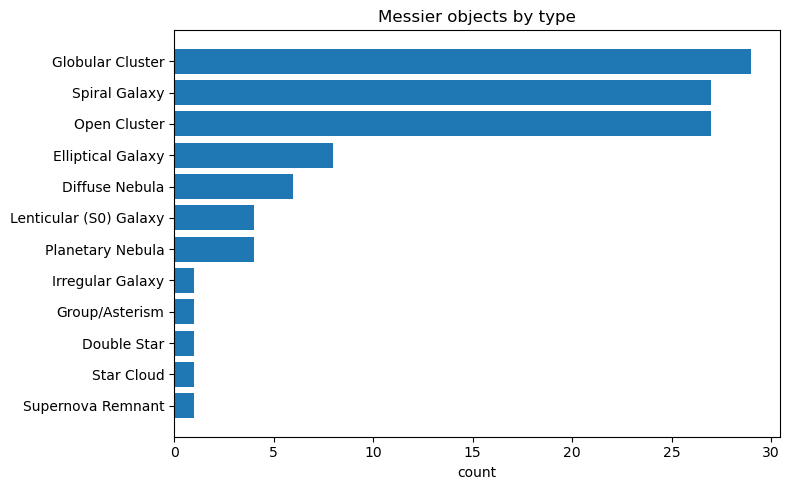

In [61]:
# breakdown by object type (table + bar)
type_counts = (
    messier["Type"]
    .value_counts()
    .sort_values(ascending=True)
)

# table
type_counts.to_frame("count")

# bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.barh(type_counts.index.to_list(), type_counts.values)
plt.xlabel("count")
plt.title("Messier objects by type")
plt.tight_layout()
plt.show()


The `!pip install` command will install the xlrd package in your environment. After that, the pandas read_excel function should work correctly with your .xls file.